# Fitting curves to detrend data 17/06/21

In [107]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import iris



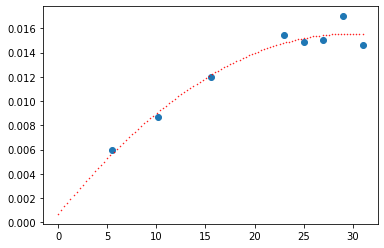

In [73]:
def straight_line_function(x,m,c):    
    y = (m*x) + c
    return y


def quadratic_function(x,a,b,c):    
    y = (a*(x**2.0)) + (b*x) + c
    return y


def quadratic_function2(x,a,b,c,d):    
    y = (a*(x**3.0)) + (b*(x**2.0)) + (c*x) + d
    return y

x = np.array([5.5,10.2,15.6,23.0,25.0,27,29,31])
y= np.array([ 0.006, 0.0087 ,0.0119838, 0.01541191 ,0.01484149, 0.015, 0.017, 0.0146])


plt.scatter(x,y)

parameters, var = curve_fit(quadratic_function,x,y)

fitted_curve_x_values = np.linspace(0,31,100)
fitted_curve_y_values = quadratic_function(fitted_curve_x_values, *parameters)

plt.plot(fitted_curve_x_values, fitted_curve_y_values,'r.',ms=1) 
plt.show()

Detrending the data

In [74]:
y_values_anomaly_from_curve = quadratic_function(x, *parameters)

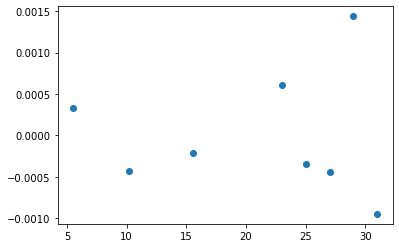

In [75]:
plt.scatter(x,y-y_values_anomaly_from_curve)


## same thing but on 3D array

In [132]:
#Read in some data

file = '/Users/ph290/Downloads/historical_bottomtemperature_1960.nc'
cube = iris.load_cube(file)
cube_data = cube.data

In [134]:
#define the equation to use as a function

def quadratic_function(x,a,b,c):    
    y = (a*(x**2.0)) + (b*x) + c
    return y

shape = np.shape(cube_data)
output_cube_data = cube_data.copy()
output_cube_data[:] = np.nan

#Do teh detrending
for i in range(shape[1]):
    for j in range(shape[2]):
        parameters, var = curve_fit(quadratic_function,np.arange(shape[0]),cube_data[:,i,j])
        y_values_anomaly_from_curve = quadratic_function(cube_data[:,i,j], *parameters)
        output_cube_data[:,i,j] = cube_data[:,i,j]-y_values_anomaly_from_curve

#Put the detrended data back in to the original cube
cube.data = output_cube_data